In [1]:
import os
import pandas as pd
import numpy as np
import mygene
import gseapy as gp
import gseapy.plot as gseaplot

from gseapy import enrichment_map
import networkx as nx

%matplotlib inline
%config InlineBackend.figure_format='retina' 
%load_ext autoreload
%autoreload 2
import csv
import numpy as np
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

from gseapy.plot import barplot, dotplot

In [2]:
def get_top_ranked_genes(DEG, state):
    '''
    This function takes a DEG file path and number of genes as input and returns a list of top-ranked genes 
    with their ranks based on the DEG file.
    '''
    # Read the DEG file and calculate rank
    Calu3_12h_DEGs = pd.read_csv(DEG, sep=',')
    
    if state == 'up':
        Calu3_12h_DEGs = Calu3_12h_DEGs[(Calu3_12h_DEGs['log2FoldChange'] > 1) & (Calu3_12h_DEGs['padj'] < 0.05)]
    if state == 'down':
        Calu3_12h_DEGs = Calu3_12h_DEGs[(Calu3_12h_DEGs['log2FoldChange'] < -1) & (Calu3_12h_DEGs['padj'] < 0.05)]
        
    Calu3_12h_DEGs['Rank'] = -np.log10(Calu3_12h_DEGs.padj)*Calu3_12h_DEGs.log2FoldChange
    
    Calu3_12h_DEGs = Calu3_12h_DEGs.sort_values('Rank', ascending=False).reset_index(drop=True)
    ranking = Calu3_12h_DEGs[['Unnamed: 0', 'Rank']]

    # Annotate gene symbols using mygene package
    mg = mygene.MyGeneInfo()
    geneSyms = mg.querymany(ranking['Unnamed: 0'], scopes='ensembl.gene')
    
    df = pd.DataFrame(geneSyms)  # Convert annotation of genes into readable format
    df = df.dropna(subset=['symbol'])  # Drop rows with unexpected gene symbol
    ranking['symbol'] = df['symbol']

    # Filter out any remaining rows with NaNs
    ranking = ranking.dropna(subset=['symbol'])
    # Return the top-ranked genes based on the input num_genes
    return  ranking[['symbol','Rank']]

In [3]:
def enrich_genes(top_ranked_genes):

    enr_Reactome = gp.enrichr(gene_list=top_ranked_genes,
                                 gene_sets=['Reactome_2022'],
                                 organism='Human', 
                                 cutoff=0.25)
    
    enr_GOBP = gp.enrichr(gene_list=top_ranked_genes,
                             gene_sets=['GO_Biological_Process_2021'],
                             organism='Human', 
                             cutoff=0.25)
    
    enr_GOMF = gp.enrichr(gene_list=top_ranked_genes ,
                             gene_sets=['GO_Molecular_Function_2021'],
                             organism='Human', 
                             cutoff=0.25)
    
    
    # Write results to CSV files
    #file_name = os.path.basename(file_path).split('.')[0]
    #enr_Reactome_up.results.to_csv(f'{file_name}_enr_Reactome.csv')
    
    return enr_Reactome, enr_GOBP, enr_GOMF

In [4]:
DEG_12 = '/Users/sofialuk/Desktop/thesis/Calu3/calu3_deseq/Calu3_DEGs_12h.csv'
DEG_8 = '/Users/sofialuk/Desktop/thesis/Calu3/calu3_deseq/Calu3_DEGs_8h.csv'


DEGs_up_12 = get_top_ranked_genes(DEG_12, 'up')
DEGs_down_12 = get_top_ranked_genes(DEG_12, 'down')


DEGs_up_8 = get_top_ranked_genes(DEG_8, 'up')
DEGs_down_8 = get_top_ranked_genes(DEG_8, 'down')


enr_Reactome_up_12, enr_GOBP_up_12, enr_GOMF_up_12 = enrich_genes(DEGs_up_12)
enr_Reactome_up_8, enr_GOBP_up_8, enr_GOMF_up_8 = enrich_genes(DEGs_up_8)


enr_Reactome_down_8, enr_GOBP_down_8, enr_GOMF_down_8 = enrich_genes(DEGs_down_8)
enr_Reactome_down_12, enr_GOBP_down_12, enr_GOMF_down_12 = enrich_genes(DEGs_down_12)

/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


querying 1-770...done.
Finished.
1 input query terms found no hit:
	['ENSG00000112096']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.
querying 1-38...

/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_10131/1812069225.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['symbol'] = df['symbol']


done.
Finished.
querying 1-486...

/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_10131/1812069225.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['symbol'] = df['symbol']
/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


done.
Finished.
4 input query terms found no hit:
	['ENSG00000244693', 'ENSG00000225932', 'ENSG00000270672', 'ENSG00000271043']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.
querying 1-98...

/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_10131/1812069225.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['symbol'] = df['symbol']


done.
Finished.


/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_10131/1812069225.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['symbol'] = df['symbol']


In [5]:
set(enr_Reactome_down_12.res2d['Term'].head(10)) 


{'Ca2+ Activated K+ Channels R-HSA-1296052',
 'Cargo Recognition For Clathrin-Mediated Endocytosis R-HSA-8856825',
 'Creatine Metabolism R-HSA-71288',
 'Free Fatty Acid Receptors R-HSA-444209',
 'Fructose Catabolism R-HSA-70350',
 'Fructose Metabolism R-HSA-5652084',
 'L1CAM Interactions R-HSA-373760',
 'Neurofascin Interactions R-HSA-447043',
 'NrCAM Interactions R-HSA-447038',
 'Serotonin And Melatonin Biosynthesis R-HSA-209931'}

In [6]:
set(enr_Reactome_down_8.res2d['Term'].head(10)) 


{'Cap-dependent Translation Initiation R-HSA-72737',
 'Eukaryotic Translation Elongation R-HSA-156842',
 'Major Pathway Of rRNA Processing In Nucleolus And Cytosol R-HSA-6791226',
 'Metabolism Of RNA R-HSA-8953854',
 'Peptide Chain Elongation R-HSA-156902',
 'Regulation Of Expression Of SLITs And ROBOs R-HSA-9010553',
 'Selenocysteine Synthesis R-HSA-2408557',
 'Translation R-HSA-72766',
 'rRNA Processing In Nucleus And Cytosol R-HSA-8868773',
 'rRNA Processing R-HSA-72312'}

In [7]:
set(enr_Reactome_up_8.res2d['Term'].head(20)) 



{'Antiviral Mechanism By IFN-stimulated Genes R-HSA-1169410',
 'Chemokine Receptors Bind Chemokines R-HSA-380108',
 'Cytokine Signaling In Immune System R-HSA-1280215',
 'DDX58/IFIH1-mediated Induction Of Interferon-Alpha/Beta R-HSA-168928',
 'ISG15 Antiviral Mechanism R-HSA-1169408',
 'Immune System R-HSA-168256',
 'Interferon Alpha/Beta Signaling R-HSA-909733',
 'Interferon Gamma Signaling R-HSA-877300',
 'Interferon Signaling R-HSA-913531',
 'Interleukin-10 Signaling R-HSA-6783783',
 'Interleukin-20 Family Signaling R-HSA-8854691',
 'MyD88 Dependent Cascade Initiated On Endosome R-HSA-975155',
 'Negative Regulators Of DDX58/IFIH1 Signaling R-HSA-936440',
 'OAS Antiviral Response R-HSA-8983711',
 'Signaling By Interleukins R-HSA-449147',
 'Toll Like Receptor 3 (TLR3) Cascade R-HSA-168164',
 'Toll Like Receptor 4 (TLR4) Cascade R-HSA-166016',
 'Toll Like Receptor 7/8 (TLR7/8) Cascade R-HSA-168181',
 'Toll Like Receptor 9 (TLR9) Cascade R-HSA-168138',
 'Toll-like Receptor Cascades R-HS

In [8]:
set(enr_Reactome_up_12.res2d['Term'].head(20)) 



{'Adaptive Immune System R-HSA-1280218',
 'Antiviral Mechanism By IFN-stimulated Genes R-HSA-1169410',
 'Chemokine Receptors Bind Chemokines R-HSA-380108',
 'Cytokine Signaling In Immune System R-HSA-1280215',
 'DDX58/IFIH1-mediated Induction Of Interferon-Alpha/Beta R-HSA-168928',
 'Immune System R-HSA-168256',
 'Innate Immune System R-HSA-168249',
 'Interferon Alpha/Beta Signaling R-HSA-909733',
 'Interferon Gamma Signaling R-HSA-877300',
 'Interferon Signaling R-HSA-913531',
 'Interleukin-10 Signaling R-HSA-6783783',
 'Interleukin-4 And Interleukin-13 Signaling R-HSA-6785807',
 'MyD88 Dependent Cascade Initiated On Endosome R-HSA-975155',
 'MyD88-independent TLR4 Cascade R-HSA-166166',
 'Negative Regulators Of DDX58/IFIH1 Signaling R-HSA-936440',
 'Signaling By Interleukins R-HSA-449147',
 'Toll Like Receptor 3 (TLR3) Cascade R-HSA-168164',
 'Toll Like Receptor 4 (TLR4) Cascade R-HSA-166016',
 'Toll Like Receptor 7/8 (TLR7/8) Cascade R-HSA-168181',
 'Toll-like Receptor Cascades R-HS

In [9]:
set(enr_Reactome_down_8.res2d['Term'].head(20)) 

{'Cap-dependent Translation Initiation R-HSA-72737',
 'Cellular Response To Starvation R-HSA-9711097',
 'Eukaryotic Translation Elongation R-HSA-156842',
 'Eukaryotic Translation Termination R-HSA-72764',
 'Formation Of A Pool Of Free 40S Subunits R-HSA-72689',
 'GTP Hydrolysis And Joining Of 60S Ribosomal Subunit R-HSA-72706',
 'L13a-mediated Translational Silencing Of Ceruloplasmin Expression R-HSA-156827',
 'Major Pathway Of rRNA Processing In Nucleolus And Cytosol R-HSA-6791226',
 'Metabolism Of RNA R-HSA-8953854',
 'Nonsense Mediated Decay (NMD) Independent Of Exon Junction Complex (EJC) R-HSA-975956',
 'Peptide Chain Elongation R-HSA-156902',
 'Regulation Of Expression Of SLITs And ROBOs R-HSA-9010553',
 'Response Of EIF2AK4 (GCN2) To Amino Acid Deficiency R-HSA-9633012',
 'SRP-dependent Cotranslational Protein Targeting To Membrane R-HSA-1799339',
 'Selenocysteine Synthesis R-HSA-2408557',
 'Signaling By ROBO Receptors R-HSA-376176',
 'Translation R-HSA-72766',
 'Viral mRNA Tran

In [10]:
set(enr_Reactome_down_12.res2d['Term'].head(20)) 



{'Ca2+ Activated K+ Channels R-HSA-1296052',
 'Cargo Recognition For Clathrin-Mediated Endocytosis R-HSA-8856825',
 'Clathrin-mediated Endocytosis R-HSA-8856828',
 'Creatine Metabolism R-HSA-71288',
 'Diseases Associated With Visual Transduction R-HSA-2474795',
 'Ephrin Signaling R-HSA-3928664',
 'Free Fatty Acid Receptors R-HSA-444209',
 'Fructose Catabolism R-HSA-70350',
 'Fructose Metabolism R-HSA-5652084',
 'L1CAM Interactions R-HSA-373760',
 'Metabolism Of Amine-Derived Hormones R-HSA-209776',
 'Neurofascin Interactions R-HSA-447043',
 'Nitric Oxide Stimulates Guanylate Cyclase R-HSA-392154',
 'NrCAM Interactions R-HSA-447038',
 'Reversible Hydration Of Carbon Dioxide R-HSA-1475029',
 'Serotonin And Melatonin Biosynthesis R-HSA-209931',
 'Synthesis Of Bile Acids And Bile Salts Via 24-Hydroxycholesterol R-HSA-193775',
 'Synthesis Of Bile Acids And Bile Salts Via 27-Hydroxycholesterol R-HSA-193807',
 'Synthesis, Secretion, And Inactivation Of Glucagon-like Peptide-1 (GLP-1) R-HSA-38

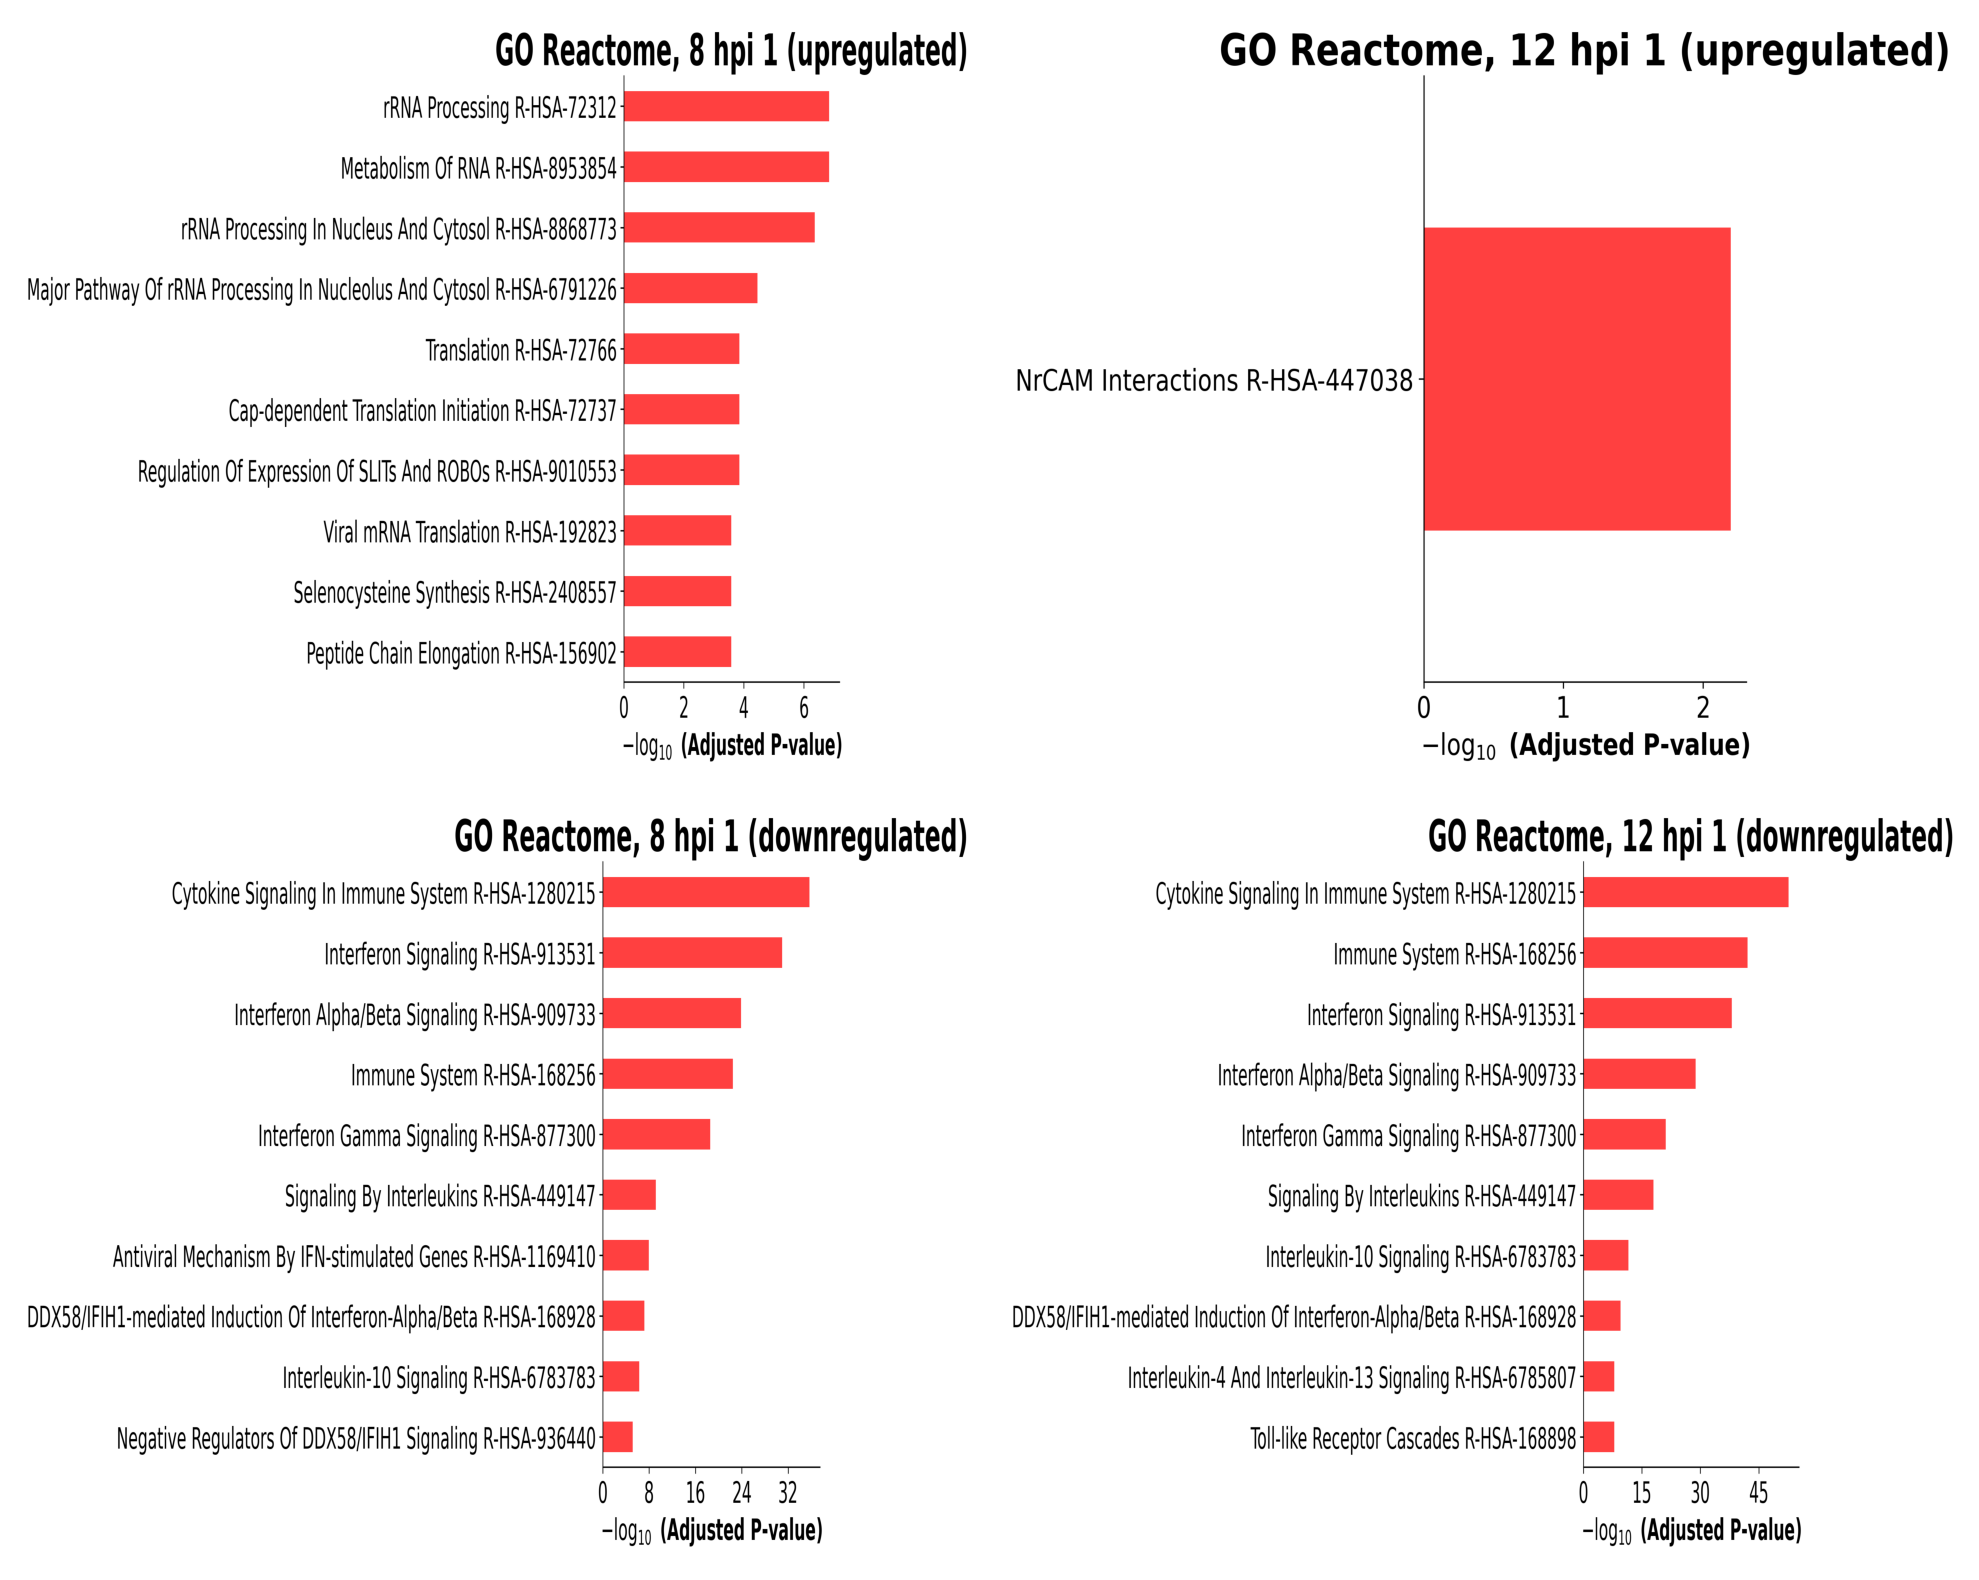

In [11]:
import matplotlib.pyplot as plt
from gseapy.plot import barplot
from io import BytesIO
from PIL import Image

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Save the bar plots as images
buf1 = BytesIO()
buf2 = BytesIO()
buf3 = BytesIO()
buf4 = BytesIO()

barplot(enr_Reactome_down_8.res2d, title='GO Reactome, 8 hpi 1 (upregulated)', color='r', ofname=buf1)
barplot(enr_Reactome_down_12.res2d, title='GO Reactome, 12 hpi 1 (upregulated)', color='r', ofname=buf2)
barplot(enr_Reactome_up_8.res2d, title='GO Reactome, 8 hpi 1 (downregulated)', color='r', ofname=buf3)
barplot(enr_Reactome_up_12.res2d, title='GO Reactome, 12 hpi 1 (downregulated)', color='r', ofname=buf4)

# Load the images
buf1.seek(0)
buf2.seek(0)
buf3.seek(0)
buf4.seek(0)

img1 = Image.open(buf1)
img2 = Image.open(buf2)
img3 = Image.open(buf3)
img4 = Image.open(buf4)

# Display the images on the subplots axes
axs[0, 0].imshow(img1, aspect='auto')
axs[0, 1].imshow(img2, aspect='auto')
axs[1, 0].imshow(img3, aspect='auto')
axs[1, 1].imshow(img4, aspect='auto')

# Remove axes labels
for ax in axs.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()

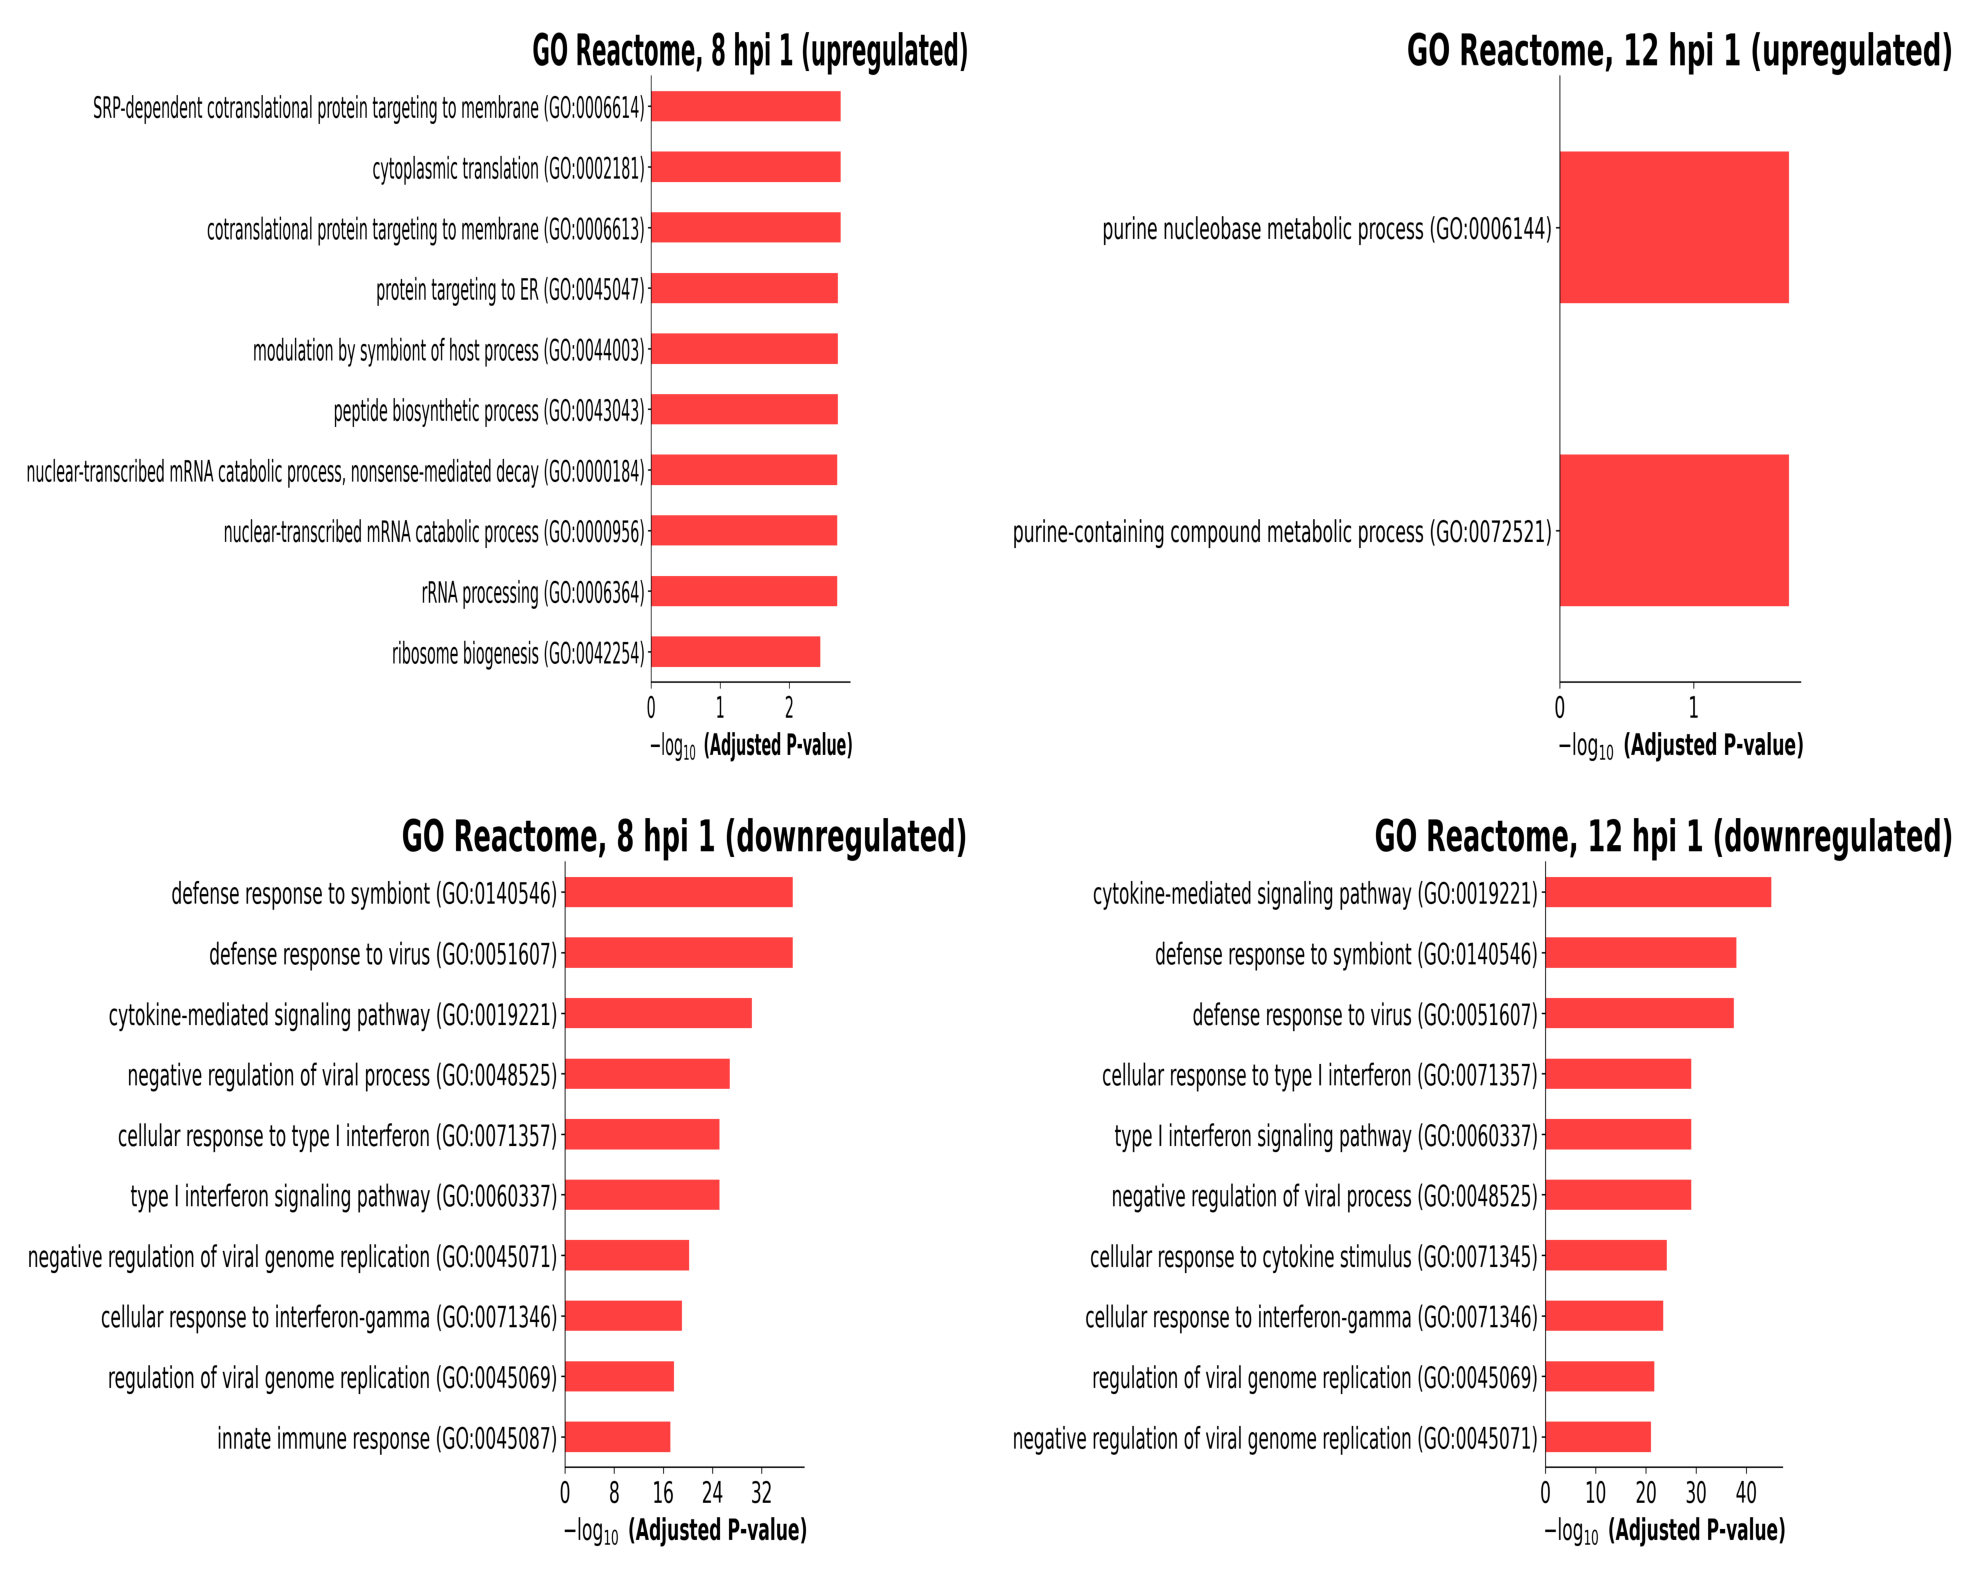

In [12]:
import matplotlib.pyplot as plt
from gseapy.plot import barplot
from io import BytesIO
from PIL import Image

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Save the bar plots as images
buf1 = BytesIO()
buf2 = BytesIO()
buf3 = BytesIO()
buf4 = BytesIO()

barplot(enr_GOBP_down_8.res2d, title='GO Reactome, 8 hpi 1 (upregulated)', color='r', ofname=buf1)
barplot(enr_GOBP_down_12.res2d, title='GO Reactome, 12 hpi 1 (upregulated)', color='r', ofname=buf2)
barplot(enr_GOBP_up_8.res2d, title='GO Reactome, 8 hpi 1 (downregulated)', color='r', ofname=buf3)
barplot(enr_GOBP_up_12.res2d, title='GO Reactome, 12 hpi 1 (downregulated)', color='r', ofname=buf4)

# Load the images
buf1.seek(0)
buf2.seek(0)
buf3.seek(0)
buf4.seek(0)

img1 = Image.open(buf1)
img2 = Image.open(buf2)
img3 = Image.open(buf3)
img4 = Image.open(buf4)

# Display the images on the subplots axes
axs[0, 0].imshow(img1, aspect='auto')
axs[0, 1].imshow(img2, aspect='auto')
axs[1, 0].imshow(img3, aspect='auto')
axs[1, 1].imshow(img4, aspect='auto')

# Remove axes labels
for ax in axs.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()

In [13]:
DEGs_up_8.to_csv('pseudo_calu3_DEGs_up_8.csv')
DEGs_up_12.to_csv('pseudo_calu3_DEGs_up_12.csv')

DEGs_down_8.to_csv('pseudo_calu3_DEGs_down_8.csv')
DEGs_down_12.to_csv('pseudo_calu3_DEGs_down_12.csv')

# The interscection of genes found by different methods

In [14]:
single_8_up = pd.read_csv('/Users/sofialuk/Desktop/thesis/Calu3/calu3_desingle/single_calu3_DEGs_up_8.csv')
single_8_down =  pd.read_csv('/Users/sofialuk/Desktop/thesis/Calu3/calu3_desingle/single_calu3_DEGs_down_8.csv')
single_12_up =  pd.read_csv('/Users/sofialuk/Desktop/thesis/Calu3/calu3_desingle/single_calu3_DEGs_up_12.csv')
single_12_down =  pd.read_csv('/Users/sofialuk/Desktop/thesis/Calu3/calu3_desingle/single_calu3_DEGs_down_12.csv')

In [15]:
print('Upregulated genes in Calu-3')
print("Number of genes detected by DESeq2: ", DEGs_up_8['symbol'].shape[0])
print("Number of genes detected by DEsingle: ", single_8_up['symbol'].shape[0])
print("Interscection of the two methods: ",len(set(DEGs_up_8['symbol']) & set(single_8_up['symbol'])))

Upregulated genes in Calu-3
Number of genes detected by DESeq2:  482
Number of genes detected by DEsingle:  121
Interscection of the two methods:  112


In [16]:
import pandas as pd

# define the conditions, methods, and hours
conditions = ['up', 'down']
methods = ['pseudo', 'single']
hours = [8, 12]

# initialize an empty list to store the results
results = []

# iterate over the conditions, methods, and hours
for hour in hours:
    for method in methods:
        for condition in conditions:
            if method == 'pseudo':
                # construct the filename for DEGs

                filename = f"/Users/sofialuk/Desktop/thesis/Calu3/calu3_GSEA/{method}_calu3_DEGs_{condition}_{hour}.csv"
            else:
                # construct the filename for single
                filename = f"/Users/sofialuk/Desktop/thesis/Calu3/calu3_desingle/{method}_calu3_DEGs_{condition}_{hour}.csv"

            # read in the data
            data = pd.read_csv(filename)
            
            # compute the intersection of the two methods
            if method == 'DEGs':
                intersection = len(set(data['symbol']) & set(single_8_up['symbol']))
            else:
                intersection = len(set(data['symbol']) & set(single_8_up['symbol']))           
            
            # add the results to the list
            results.append({
                'Hour': hour,
                'Condition': condition,
                'Method': method,
                'NumGenes': data['symbol'].shape[0],
                'Intersection': intersection
            })

# create a DataFrame from the results and display it
df = pd.DataFrame(results)
print(df)


   Hour Condition  Method  NumGenes  Intersection
0     8        up  pseudo       482           112
1     8      down  pseudo        98             0
2     8        up  single       121           121
3     8      down  single       316             0
4    12        up  pseudo       769           109
5    12      down  pseudo        38             0
6    12        up  single         2             0
7    12      down  single      4422           118


In [17]:
# DEGs with |L2FC| > 1 and padj < 0.05, Calu-3

df 

,Hour,Condition,Method,NumGenes,Intersection
0,8,up,pseudo,482,112
1,8,down,pseudo,98,0
2,8,up,single,121,121
3,8,down,single,316,0
4,12,up,pseudo,769,109
5,12,down,pseudo,38,0
6,12,up,single,2,0
7,12,down,single,4422,118


In [18]:
import pandas as pd

# define the conditions, methods, and hours
conditions = ['up', 'down']
methods = ['pseudo', 'single']
hours = [8, 12]

# initialize an empty list to store the results
results = []

# iterate over the conditions, methods, and hours
for condition in conditions:
    for method in methods:
        for hour in hours:
            if method == 'pseudo':
                # construct the filename for DEGs
                filename = f"/Users/sofialuk/Desktop/thesis/Calu3/calu3_GSEA/{method}_calu3_DEGs_{condition}_{hour}.csv"
            else:
                # construct the filename for single
                filename = f"/Users/sofialuk/Desktop/thesis/Calu3/calu3_desingle/{method}_calu3_DEGs_{condition}_{hour}.csv"

            # read in the data
            data = pd.read_csv(filename)
            
            # compute the intersection of the two methods
            if method == 'pseudo':
                other_method = 'single'
                
            else:
                other_method = 'pseudo'
                
            if method == 'single':               
                other_filename = f"/Users/sofialuk/Desktop/thesis/Calu3/calu3_GSEA/{other_method}_calu3_DEGs_{condition}_{hour}.csv"
                other_data = pd.read_csv(other_filename)
            else:
                other_filename = f"/Users/sofialuk/Desktop/thesis/Calu3/calu3_desingle/{other_method}_calu3_DEGs_{condition}_{hour}.csv"
                other_data = pd.read_csv(other_filename)
            
            intersection = len(set(data['symbol']) & set(other_data['symbol']))
            
            # add the results to the list
            results.append({
                'Condition': condition,
                'Method': method,
                'Hour': hour,
                'NumGenes': data['symbol'].shape[0],
                'Intersection': intersection
            })

# create a DataFrame from the results and display it
df = pd.DataFrame(results)
print(df)


  Condition  Method  Hour  NumGenes  Intersection
0        up  pseudo     8       482           112
1        up  pseudo    12       769             0
2        up  single     8       121           112
3        up  single    12         2             0
4      down  pseudo     8        98             4
5      down  pseudo    12        38             0
6      down  single     8       316             4
7      down  single    12      4422             0


In [19]:
enr_Reactome_up_8.res2d[enr_Reactome_up_8.res2d['Term'].str.contains('Hypoxia')]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes


In [20]:
enr_GOBP_up_12.res2d['Term'].head(20)

0      cytokine-mediated signaling pathway (GO:0019221)
1             defense response to symbiont (GO:0140546)
2                defense response to virus (GO:0051607)
3     cellular response to type I interferon (GO:007...
4      type I interferon signaling pathway (GO:0060337)
5     negative regulation of viral process (GO:0048525)
6     cellular response to cytokine stimulus (GO:007...
7     cellular response to interferon-gamma (GO:0071...
8     regulation of viral genome replication (GO:004...
9     negative regulation of viral genome replicatio...
10                  innate immune response (GO:0045087)
11    positive regulation of intracellular signal tr...
12            response to interferon-gamma (GO:0034341)
13    interferon-gamma-mediated signaling pathway (G...
14    regulation of I-kappaB kinase/NF-kappaB signal...
15                    response to cytokine (GO:0034097)
16          response to lipopolysaccharide (GO:0032496)
17    positive regulation of I-kappaB kinase/NF-

In [21]:
enr_GOBP_up_8.res2d['Term'].head(20)

0             defense response to symbiont (GO:0140546)
1                defense response to virus (GO:0051607)
2      cytokine-mediated signaling pathway (GO:0019221)
3     negative regulation of viral process (GO:0048525)
4     cellular response to type I interferon (GO:007...
5      type I interferon signaling pathway (GO:0060337)
6     negative regulation of viral genome replicatio...
7     cellular response to interferon-gamma (GO:0071...
8     regulation of viral genome replication (GO:004...
9                   innate immune response (GO:0045087)
10    interferon-gamma-mediated signaling pathway (G...
11    cellular response to cytokine stimulus (GO:007...
12            response to interferon-gamma (GO:0034341)
13    regulation of I-kappaB kinase/NF-kappaB signal...
14    positive regulation of intracellular signal tr...
15    positive regulation of I-kappaB kinase/NF-kapp...
16    negative regulation of innate immune response ...
17                    response to cytokine (GO:0

In [22]:
enr_GOBP_up_12.res2d[enr_GOBP_up_12.res2d['Term'].str.contains('hypoxia')]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
699,GO_Biological_Process_2021,cellular response to hypoxia (GO:0071456),10/131,0.029870,0.147252,0,0,2.080815,7.305509,CREBBP;GATA6;PSME2;PMAIP1;CARD16;PTGS2;BACH1;C...
2245,GO_Biological_Process_2021,regulation of transcription from RNA polymeras...,4/75,0.326131,0.510542,0,0,1.411028,1.580993,CREBBP;PSME2;BACH1;PSMB10


In [23]:
enr_GOBP_down_8.res2d['Term'].head(20)

0     SRP-dependent cotranslational protein targetin...
1                  cytoplasmic translation (GO:0002181)
2     cotranslational protein targeting to membrane ...
3                  protein targeting to ER (GO:0045047)
4     modulation by symbiont of host process (GO:004...
5             peptide biosynthetic process (GO:0043043)
6     nuclear-transcribed mRNA catabolic process, no...
7     nuclear-transcribed mRNA catabolic process (GO...
8                          rRNA processing (GO:0006364)
9                      ribosome biogenesis (GO:0042254)
10                  tRNA 5'-end processing (GO:0099116)
11                             translation (GO:0006412)
12                  rRNA metabolic process (GO:0016072)
13      cellular protein metabolic process (GO:0044267)
14    regulation of protein monoubiquitination (GO:1...
15    intracellular sequestering of iron ion (GO:000...
16    positive regulation of protein monoubiquitinat...
17                      snRNA modification (GO:0

In [24]:
enr_GOBP_down_12.res2d['Term'].head(20)

0     purine-containing compound metabolic process (...
1      purine nucleobase metabolic process (GO:0006144)
2         regulation of dopamine secretion (GO:0014059)
3                  response to calcium ion (GO:0051592)
4         calcium-ion regulated exocytosis (GO:0017156)
5     regulation of catecholamine secretion (GO:0050...
6     regulation of calcium ion-dependent exocytosis...
7     regulation of regulated secretory pathway (GO:...
8                     regulated exocytosis (GO:0045055)
9          regulation of secretion by cell (GO:1903530)
10        cellular response to calcium ion (GO:0071277)
11    5-phosphoribose 1-diphosphate biosynthetic pro...
12    5-phosphoribose 1-diphosphate metabolic proces...
13             serotonin metabolic process (GO:0042428)
14    sinoatrial node cell differentiation (GO:0060921)
15    pyrimidine nucleotide metabolic process (GO:00...
16              fructose catabolic process (GO:0006001)
17    fructose catabolic process to hydroxyaceto